<a href="https://colab.research.google.com/github/ArVos89/Arsham-DataScience/blob/main/FactorsGivingRiseToMassShootingsUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving TVP-Mass-Shooter-Database-V4-FINAL.csv to TVP-Mass-Shooter-Database-V4-FINAL.csv
(0.9583585262298584, 6.652747833868489e-05) Normality test Age
(0.7098938226699829, 8.092517705609613e-17) Normality test Race
(0.8844425082206726, 3.9154149367170987e-10) Normality test State
(0.8376231789588928, 2.1950889456806566e-12) Normality test MI
(0.13548517227172852, 3.393299435689771e-27) Normality test toKI


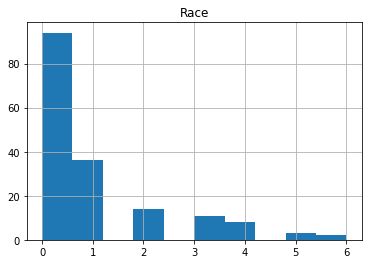

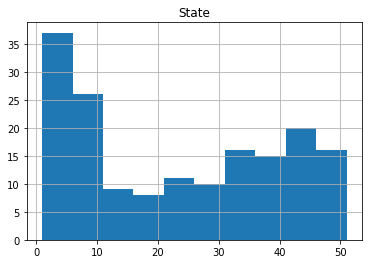

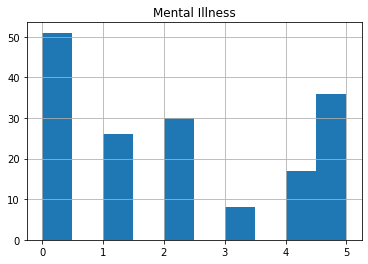

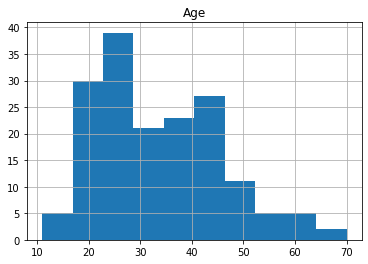

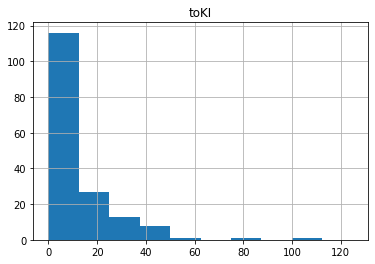

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
import io
from google.colab import files
uploaded = files.upload()
import scipy.stats as sp
from sklearn import preprocessing
from scipy.stats import normaltest

# DataSet: Mass-shooting Project, various data and info affilated with mass-shooting in the U.S. between 1966-2020
#  Sample column : Age, State, Time, Motivation, Substance Abuse, Religion .......

# #discription of used columns
# 'Number Killed'  Total people killed in an incident
# 'Number Injured' Total people injured in an incident
# 'toKI' Total number of people killed or injured
# 'State' State where the incident happened
# 'Age'  Age of the shooter
# 'Race' Race of the Shooter
#Link to URL: https://www.theviolenceproject.org/



  
df = pd.read_csv(io.BytesIO(uploaded['TVP-Mass-Shooter-Database-V4-FINAL.csv'])) # Dataset is uploaded from the device

#Size of the DataSet
df.shape

#a new column is created as a sum of 'Number Killed' and 'Number Injured' columns to reflect the total casualties 
toKI=df['Number Killed']+df['Number Injured']

# adding the column to dataset
df['toKI']=toKI          

df.dropna(subset=['Race'], inplace=True)    # eliminating na values
df.dropna(subset=['State'], inplace=True)
df.dropna(subset=['Mental Illness'], inplace=True)
df.dropna(subset=['Age'], inplace=True)
df.dropna(subset=['toKI'], inplace=True)

# histograms to check normality
df.hist(column='Race')  
df.hist(column='State')
df.hist(column='Mental Illness')
df.hist(column='Age')
df.hist(column='toKI', range=(0,125))



# Shaipro test for normality
print(stats.shapiro(df['Age']), 'Normality test Age')    
print(stats.shapiro(df['Race']), 'Normality test Race')
print(stats.shapiro(df['State']), 'Normality test State')
print(stats.shapiro(df['Mental Illness']),"Normality test MI")
print(stats.shapiro(df['toKI']), 'Normality test toKI')



  


In [ ]:

# apply normalization techniques on Column 'toKI' since normality disputed
# Using Z scale mean method

#assigning column name
column = 'toKI'

# copy the data
df_z_scaled = df.copy()
df_z_scaled[column] = toKI

# apply normalization technique to Column 
df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()    

# Checking normality of column again
stat, p = normaltest(df_z_scaled[column])
if p < 0.05: 
 print('P = ',p, ': Data apears normal, P << 0.05')


P =  1.5023410027871162e-78 : Data apears normal, P << 0.05


KruskalResult(statistic=251.44566752536622, pvalue=1.2568246369027785e-56) T-Test for Age, P << 0.05 ,Null-hyp rejected,The Age effect on Total casualty is observed
KruskalResult(statistic=150.9487460961548, pvalue=1.0754510063724837e-34) T Test for race, P << 0.05 ,Null-hyp Rejected,The Race effect on Total casualty is observed
KruskalResult(statistic=249.29740315167587, pvalue=3.694987497571813e-56) T-Test for State, P << 0.05 ,Null-hyp rejected,The State/location effect on Total casualty is observed
KruskalResult(statistic=190.1599557337624, pvalue=2.9337036224930654e-43) T-Test for Mental Illness, P << 0.05 ,Null-hyp rejecjted, The MI effect on Total casualty is observed


Text(0.5, 1.0, 'Correlation Chart')

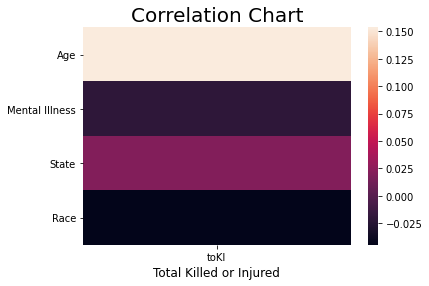

In [ ]:
# Applying Kruskal_Wallis  between each group
# Null Hypothesis : 
#   Pre-Assumption Null Hypothesis is True Meaning There no signifcant difference between the mean of two samples, H_O= 0
#   Alternative Hypothesis : Null-Hypothesis Rejected, There is a significant diffrence between the means of two samples, H_A !=0
#       If P-Value is smaller than 0.05, meaning there is an effect from the variable to our dependant variable 'toKI   
       

from scipy.stats import mstats

stats, pval=mstats.kruskalwallis(np.array(df_z_scaled['toKI']),np.array(df['Age']))
if pval < 0.05:
  print(mstats.kruskalwallis(np.array(df['Age']), np.array(df_z_scaled['toKI'] )), "T-Test for Age, P << 0.05 ,Null-hyp rejected,The Age effect on Total casualty is observed")
else : print ('Null-hyp valid')

stats, pval=mstats.kruskalwallis(np.array(df_z_scaled['toKI']),np.array(df['Race']))
if pval < 0.05 :
  print(mstats.kruskalwallis(np.array(df['Race']), np.array(df_z_scaled['toKI'])) ,"T Test for race, P << 0.05 ,Null-hyp Rejected,The Race effect on Total casualty is observed")
else : print ('Null-hyp valid')


stat,pval = mstats.kruskalwallis(np.array(df_z_scaled['toKI']),np.array(df['State']))
if pval < 0.05:
  print(mstats.kruskalwallis(np.array(df['State']), np.array(df_z_scaled['toKI'])), "T-Test for State, P << 0.05 ,Null-hyp rejected,The State/location effect on Total casualty is observed")
else : print ('Null-hyp valid')


stat,pval = mstats.kruskalwallis(np.array(df_z_scaled['toKI']),np.array(df['Mental Illness']))
if pval < 0.05:
  print(mstats.kruskalwallis(np.array(df['Mental Illness']), np.array(df_z_scaled['toKI'])), "T-Test for Mental Illness, P << 0.05 ,Null-hyp rejecjted, The MI effect on Total casualty is observed")
else : print ('Null-hyp valid')

# correlation strength of each variable on 'toKI' (darker color indicates stronger correlation)
# Correlation is generally between 0 to 1
df1=df[['Age','Mental Illness','State','Race','toKI']]
corr = df1.corr()

x = corr[['toKI']]
y=x.drop('toKI')
sns.heatmap(y)
plt.xlabel('Total Killed or Injured', fontsize = 12)
plt.title('Correlation Chart', fontsize = 20)